In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
import prep
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
import math

from statsmodels.tsa.api import Holt


In [2]:
df = prep.get_stores_data()

In [ ]:
df.dtypes

In [ ]:
df['2013-01-01']

In [3]:
df2 = df.sales_total.resample('D').sum()
df2 = df.sales_total.resample('W').sum()

In [6]:
train, test = prep.split_store_data(df2,train_prop=.66)

In [9]:
train = train.set_index('sale_date')

In [10]:
test = test.set_index('sale_date')

In [12]:
train.head(2)

,sales_total
sale_date,
2013-01-06 00:00:00+00:00,490767.50
2013-01-13 00:00:00+00:00,559934.21


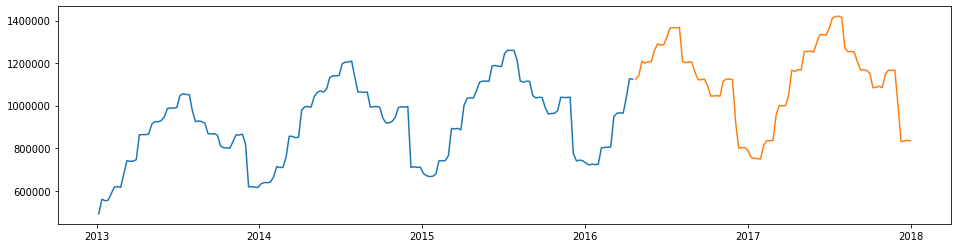

In [11]:
plt.figure(figsize=(16, 4))
plt.plot(train)
plt.plot(test)
plt.show()

In [29]:
len(train)

172

In [34]:
test['yhat'] = train.sales_total.mean()
yhat = test.yhat

In [35]:
test.drop(columns='yhat',inplace=True)

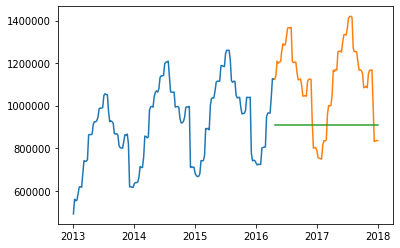

In [36]:
plt.plot(train)
plt.plot(test)
plt.plot(yhat)
plt.show()

In [47]:
test['moving_avg'] = train.sales_total.rolling(30).mean().iloc[-1]
yhat = test.moving_avg
test.drop(columns='moving_avg',inplace=True)

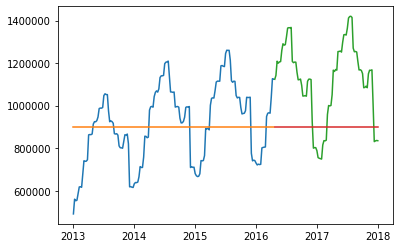

In [48]:
plt.plot(train)
plt.plot(test)
plt.plot(yhat)
plt.show()

In [73]:
model = Holt(train.sales_total).fit()
test['holt'] = pd.DataFrame(model.forecast(test.sales_total.shape[0]))

In [74]:
yhat = test.holt


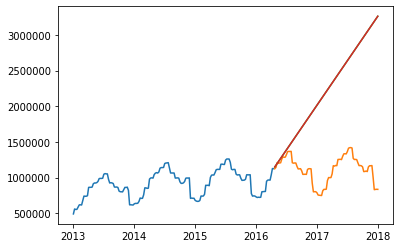

In [75]:
plt.plot(train)
plt.plot(test)
plt.plot(yhat)
plt.show()

In [76]:
test.head()

,sales_total,holt
sale_date,,
2016-04-24 00:00:00+00:00,1123776.02,1.148584e+06
2016-05-01 00:00:00+00:00,1142089.18,1.172589e+06
2016-05-08 00:00:00+00:00,1208665.09,1.196594e+06
2016-05-15 00:00:00+00:00,1199639.71,1.220599e+06
2016-05-22 00:00:00+00:00,1205501.90,1.244604e+06


In [72]:
train.head()

,sales_total
sale_date,
2013-01-06 00:00:00+00:00,490767.50
2013-01-13 00:00:00+00:00,559934.21
2013-01-20 00:00:00+00:00,552813.52
2013-01-27 00:00:00+00:00,554908.84
2013-02-03 00:00:00+00:00,586547.55
